In [1]:
import pandas as pd
import numpy as np

In [2]:
def quick_report(df):
    print("Rows:", len(df))
    print("Columns:", df.columns.tolist())
    print("\nMissing counts:")
    print(df.isna().sum().sort_values(ascending=False))
    print("\nSample types:")
    print(df.dtypes)
    print("\nSample rows:")
    print(df.head(3))
    print("-" * 40)

In [3]:
df= pd.read_csv("RuralCreditData.csv")

In [4]:
quick_report(df)

Rows: 40000
Columns: ['Id', 'city', 'age', 'sex', 'social_class', 'primary_business', 'secondary_business', 'annual_income', 'monthly_expenses', 'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house', 'occupants_count', 'house_area', 'sanitary_availability', 'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments', 'loan_amount']

Missing counts:
social_class             5255
water_availabity         5253
secondary_business       5241
city                     1864
type_of_house             694
home_ownership            379
sanitary_availability     208
monthly_expenses          120
primary_business           26
loan_purpose               26
sex                         0
Id                          0
age                         0
old_dependents              0
young_dependents            0
annual_income               0
house_area                  0
occupants_count             0
loan_tenure                 0
loan_installments           0
loan_amount         

In [5]:
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

In [6]:
numeric_cols = ["annual_income","monthly_expenses","loan_amount","loan_tenure",
                "loan_installments","age","occupants_count","house_area",
                "home_ownership","sanitary_availability","water_availabity"]

In [7]:
#changing numeric values to strings.
#ex: ₹12,000 to 12000
for c in numeric_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c].astype(str).str.replace(r"[^\d\.\-]","", regex=True), errors="coerce")

In [8]:
cat_cols = ["city","sex","social_class","primary_business","secondary_business","type_of_house","loan_purpose"]

In [9]:
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip().str.lower()
        df.loc[df[c].isin(["nan","none","null","na",""]), c] = np.nan

In [10]:
for c in ["annual_income","monthly_expenses","loan_amount","loan_tenure",
          "loan_installments","age","occupants_count","house_area"]:
    if c in df.columns:
        med = np.nanmedian(df[c])
        if np.isfinite(med):
            df[c] = df[c].fillna(med)

In [11]:
for c in ["home_ownership","sanitary_availability","water_availabity"]:
    if c in df.columns:
        med = np.nanmedian(df[c])
        if np.isfinite(med):
            df[c] = df[c].fillna(med)
        ser = df[c].astype(float)
        if ser.dropna().between(0,1).all():
            df[c] = ser.round().astype(int)
        else:
            df[c] = (ser > 0.5).astype(int)

changing NaN values in categorical

In [12]:
def _mode_or(s, fallback="unknown"):
    try:
        m = s.mode(dropna=True)
        if len(m) > 0: return m.iloc[0]
    except Exception:
        pass
    return fallback

In [13]:
fill_tokens = {
    "city": "unknown",
    "sex": _mode_or(df["sex"]) if "sex" in df.columns else "unknown",
    "social_class": "unknown",
    "primary_business": _mode_or(df["primary_business"]) if "primary_business" in df.columns else "unknown",
    "secondary_business": "none",
    "type_of_house": _mode_or(df["type_of_house"]) if "type_of_house" in df.columns else "unknown",
    "loan_purpose": _mode_or(df["loan_purpose"]) if "loan_purpose" in df.columns else "unknown",
}

In [14]:
for c, token in fill_tokens.items():
    if c in df.columns:
        df[c] = df[c].fillna(token)

In [15]:
#handling negative and NaN values in numeric
for c in ["annual_income","monthly_expenses","loan_amount","loan_tenure",
          "loan_installments","age","house_area","occupants_count"]:
    if c in df.columns:
        # Replace negatives with 0
        df[c] = df[c].clip(lower=0)

        # Fill missing with median
        df[c].fillna(df[c].median(), inplace=True)

/tmp/ipython-input-90627670.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(), inplace=True)
/tmp/ipython-input-90627670.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [16]:
#taking care of outliers (1% and 99%)
for c in ["annual_income","monthly_expenses","loan_amount","loan_tenure",
          "loan_installments","age","house_area"]:
    if c in df.columns:
        low, high = np.nanquantile(df[c], [0.01, 0.99])
        df[c] = df[c].clip(low, high)

In [17]:
quick_report(df)

Rows: 40000
Columns: ['id', 'city', 'age', 'sex', 'social_class', 'primary_business', 'secondary_business', 'annual_income', 'monthly_expenses', 'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house', 'occupants_count', 'house_area', 'sanitary_availability', 'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments', 'loan_amount']

Missing counts:
id                       0
city                     0
age                      0
sex                      0
social_class             0
primary_business         0
secondary_business       0
annual_income            0
monthly_expenses         0
old_dependents           0
young_dependents         0
home_ownership           0
type_of_house            0
occupants_count          0
house_area               0
sanitary_availability    0
water_availabity         0
loan_purpose             0
loan_tenure              0
loan_installments        0
loan_amount              0
dtype: int64

Sample types:
id                       

In [18]:
df_cleaned = df.copy()
df_cleaned.to_csv("RuralCreditData_cleaned.csv", index=False)

In [20]:
from google.colab import files
files.download("RuralCreditData_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Output Column Computation

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("RuralCreditData_cleaned.csv")

In [4]:
print(df.columns.tolist())

['id', 'city', 'age', 'sex', 'social_class', 'primary_business', 'secondary_business', 'annual_income', 'monthly_expenses', 'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house', 'occupants_count', 'house_area', 'sanitary_availability', 'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments', 'loan_amount']


In [5]:
#computing monthly income from annual income (given)
df["monthly_income"] = pd.to_numeric(df.get("annual_income", np.nan), errors="coerce") / 12.0
if df["monthly_income"].isna().any():
    df["monthly_income"] = df["monthly_income"].fillna(df["monthly_income"].median())

In [6]:
#changing all loan_tenure to monthly. if value missing, replace with 12 months
if "loan_tenure" in df.columns:
    med_lt = np.nanmedian(df["loan_tenure"])
    if np.isfinite(med_lt) and med_lt > 10:
        df["loan_tenure_months"] = df["loan_tenure"]
    else:
        df["loan_tenure_months"] = df["loan_tenure"] * 12.0
else:
    df["loan_tenure_months"] = 12.0

In [7]:
#calculating loan_to_income ratio (loan compared to income) using loan_amount. adding 1 to take care of any undefined cases
df["loan_to_income"] = (df.get("loan_amount", 0) + 1.0) / (df.get("monthly_income", 0) + 1.0)

In [8]:
#income buffer. how much income left after paying for expenses)
df["income_buffer"]  = (df.get("monthly_income", 0) + 1.0) / (df.get("monthly_expenses", 0) + 1.0)

In [9]:
#no. of years of tenure
df["tenure_years"]   = df["loan_tenure_months"] / 12.0

In [10]:
#calculating savings
df["estimated_savings"] = (df.get("annual_income", 0) - 12.0 * df.get("monthly_expenses", 0)).clip(lower=0.0)

In [11]:
#feature extraction of loan purpose into w different cols and making them binary
lp = df.get("loan_purpose", "").astype(str).str.lower()
df["consumption_loan"] = lp.str.contains("consum|personal|household|marriage|medical", na=False).astype(int)
df["agri_loan"]        = lp.str.contains("agri|farm|crop|dairy|livestock|agriculture", na=False).astype(int)

In [12]:
#making a rainfall deficit column ranging between -2 to +2
#0 means normal rainfall
#+1 means mild drought
#+2 means severe drought
#-1 means better than average rainfall
#-2 means very good monsoon
rng = np.random.default_rng(42)
df["rainfall_deficit"] = rng.normal(0.0, 0.5, size=len(df)).clip(-2.0, 2.0)

In [15]:
#z-scaling the columns using which logit (credit score/risk score) will be calculated
def z_scale(col):
  x = pd.to_numeric(col, errors="coerce").astype(float)
  med = np.nanmedian(x)
  q1, q3 = np.nanpercentile(x, [25, 75])
  iqr = max(q3 - q1, 1e-9)
  return (x - med) / (iqr / 1.349)

In [16]:
z_lti = z_scale(df["loan_to_income"])
z_IB = z_scale(df["income_buffer"])
z_savings = z_scale(df["estimated_savings"])
z_tenure = z_scale(df["tenure_years"])

In [17]:
#logit calculation
b0 = -1.8 #baseline

logit = (
    b0
  + 1.10 * z_lti                   # higher leverage → higher risk
  - 0.90 * z_IB                   # more buffer → lower risk
  - 0.50 * z_savings                  # more savings → lower risk
  - 0.30 * z_tenure                  # longer tenure → slightly lower risk
  + 0.40 * df["consumption_loan"]  # consumption use → higher risk
  - 0.20 * df["agri_loan"]         # productive agri use → lower risk
  + 0.30 * df["rainfall_deficit"]  # bad season → higher risk
  + rng.normal(0.0, 0.15, size=len(df))  # for randomness
)

In [19]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
#to convert risk score/logit to 0-1 probability (PD: Predicted Default)

In [21]:
#so average PD matches a realistic target (0.18 in our case-> observed in other datasets online)
def calibrate_shift(logits, target, tolerance=1e-6, max_iter=80):
    # find b such that mean(sigmoid(logits + b)) ~ target
    low, high = -10.0, 10.0
    for _ in range(max_iter):
        mid = 0.5 * (low + high) #binary search
        m = sigmoid(logits + mid).mean() #changing to PD and then calculating average PD (.mean())
        if m > target:
            high = mid
        else:
            low = mid
        if abs(m - target) < tolerance:
            return mid
    return 0.5 * (low + high)

In [22]:
TARGET_RATE = 0.18

In [26]:
b_shift = calibrate_shift(logit, TARGET_RATE) #found the correct shift
#i.e. how much should a PD value be shifted in order for the avg. PD value to be 0.18

In [28]:
pd_cal = sigmoid(logit + b_shift) #calculating final PD after shifting
#in calibration, we were just testing what the shift should be

In [31]:
#calculated probability of a default. now change that to binary-> default(1) or repay/did not default(0)

In [32]:
#P(X=x)=p^x(1−p)^(1−x),x∈{0,1}. bernoulli's formula

In [33]:
rng2 = np.random.default_rng(123)
default_label = (rng2.random(len(df)) < pd_cal).astype(int)

In [34]:
labels_df = pd.DataFrame({
    "pd": pd_cal,
    "default": default_label
}, index=df.index)

In [36]:
df = pd.concat([df, labels_df], axis=1)

In [37]:
df.head()

,id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,loan_tenure_months,loan_to_income,income_buffer,tenure_years,estimated_savings,consumption_loan,agri_loan,rainfall_deficit,pd,default
0,1,dhanbad,22,f,mochi,tailoring,others,36000.0,5000.0,0,...,12,1.666445,0.600080,1.0,0.0,0,0,0.152359,0.017982,0
1,2,manjapra,21,f,obc,tailoring,none,94000.0,3600.0,1,...,12,0.957452,2.175599,1.0,50800.0,0,0,-0.519992,0.000100,0
2,3,dhanbad,24,m,nai,beauty salon,others,48000.0,4000.0,0,...,12,1.249938,1.000000,1.0,0.0,0,0,0.375226,0.012711,0
3,4,unknown,26,f,obc,tailoring,none,7000.0,5000.0,0,...,12,12.836851,0.116843,1.0,0.0,0,0,0.470282,0.545261,1
4,5,nuapada,23,f,obc,general store,agriculture,36000.0,3500.0,0,...,12,1.666445,0.857184,1.0,0.0,0,0,-0.975518,0.007804,0


In [38]:
df.to_csv("RuralCreditData_cleaned_with_Default.csv", index=False)

In [40]:
from google.colab import files
files.download("RuralCreditData_cleaned_with_Default.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
print("Observed default rate:", round(df['default'].mean(), 3))

Observed default rate: 0.18


In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("RuralCreditData_cleaned_with_Default.csv")

In [4]:
df.head()

,id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,loan_tenure_months,loan_to_income,income_buffer,tenure_years,estimated_savings,consumption_loan,agri_loan,rainfall_deficit,pd,default
0,1,dhanbad,22,f,mochi,tailoring,others,36000.0,5000.0,0,...,12,1.666445,0.600080,1.0,0.0,0,0,0.152359,0.017982,0
1,2,manjapra,21,f,obc,tailoring,none,94000.0,3600.0,1,...,12,0.957452,2.175599,1.0,50800.0,0,0,-0.519992,0.000100,0
2,3,dhanbad,24,m,nai,beauty salon,others,48000.0,4000.0,0,...,12,1.249938,1.000000,1.0,0.0,0,0,0.375226,0.012711,0
3,4,unknown,26,f,obc,tailoring,none,7000.0,5000.0,0,...,12,12.836851,0.116843,1.0,0.0,0,0,0.470282,0.545261,1
4,5,nuapada,23,f,obc,general store,agriculture,36000.0,3500.0,0,...,12,1.666445,0.857184,1.0,0.0,0,0,-0.975518,0.007804,0


In [8]:
df.sample(50)

,id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,loan_tenure_months,loan_to_income,income_buffer,tenure_years,estimated_savings,consumption_loan,agri_loan,rainfall_deficit,pd,default
1622,1623,kumbi,27,f,obc,general store,others,24000.0,1200.0,0,...,12,2.499250,1.666112,1.0,9600.0,0,0,0.380927,0.004956,0
5725,5726,unknown,50,f,hindu,goat rearing,agriculture,24000.0,3500.0,0,...,12,2.499250,0.571551,1.0,0.0,0,0,0.097641,0.025225,0
5523,5524,pusad,30,f,obc,grocery store,none,30000.0,2400.0,0,...,12,2.999200,1.041649,1.0,1200.0,0,0,0.424433,0.019430,0
10721,10722,barwan,29,f,unknown,bearing work,none,0.0,2500.0,0,...,12,5001.000000,0.000400,1.0,0.0,0,0,0.577571,1.000000,1
21923,21924,imphal,31,f,obc,weaver,none,30000.0,1500.0,0,...,12,3.199120,1.666223,1.0,12000.0,0,0,0.925742,0.005882,0
30938,30939,bishnupur,48,f,obc,weaver,none,54000.0,2000.0,0,...,12,1.777605,2.249375,1.0,30000.0,0,0,-0.498308,0.000550,0
29738,29739,mathurapur,29,f,s.c,beedi rolling business,none,60000.0,3600.0,0,...,12,2.999600,1.388781,1.0,16800.0,0,0,0.220624,0.004433,0
18345,18346,mathurapur,25,f,s.c.,beedi rolling business,none,18000.0,4000.0,0,...,12,7.995336,0.375156,1.0,0.0,0,0,0.166668,0.159829,0
31556,31557,bahoriband,25,f,st,goat rearing,none,48000.0,2500.0,0,...,12,2.499625,1.599760,1.0,18000.0,0,0,0.333881,0.003000,0
26762,26763,santipur,41,f,gen,handloom work,none,60000.0,3500.0,0,...,12,1.999800,1.428449,1.0,18000.0,0,0,0.439389,0.003770,0


In [9]:
df.shape

(40000, 32)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     40000 non-null  int64  
 1   city                   40000 non-null  object 
 2   age                    40000 non-null  int64  
 3   sex                    40000 non-null  object 
 4   social_class           40000 non-null  object 
 5   primary_business       40000 non-null  object 
 6   secondary_business     40000 non-null  object 
 7   annual_income          40000 non-null  float64
 8   monthly_expenses       40000 non-null  float64
 9   old_dependents         40000 non-null  int64  
 10  young_dependents       40000 non-null  int64  
 11  home_ownership         40000 non-null  int64  
 12  type_of_house          40000 non-null  object 
 13  occupants_count        40000 non-null  int64  
 14  house_area             40000 non-null  float64
 15  sa

In [11]:
df['default'].value_counts(normalize=True) #moderately imbalanced (will handle in further steps)

,proportion
default,
0,0.8196
1,0.1804


# EDA

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [14]:
df.columns.tolist()

['id',
 'city',
 'age',
 'sex',
 'social_class',
 'primary_business',
 'secondary_business',
 'annual_income',
 'monthly_expenses',
 'old_dependents',
 'young_dependents',
 'home_ownership',
 'type_of_house',
 'occupants_count',
 'house_area',
 'sanitary_availability',
 'water_availabity',
 'loan_purpose',
 'loan_tenure',
 'loan_installments',
 'loan_amount',
 'monthly_income',
 'loan_tenure_months',
 'loan_to_income',
 'income_buffer',
 'tenure_years',
 'estimated_savings',
 'consumption_loan',
 'agri_loan',
 'rainfall_deficit',
 'pd',
 'default']

In [15]:
df.dtypes

,0
id,int64
city,object
age,int64
sex,object
social_class,object
primary_business,object
secondary_business,object
annual_income,float64
monthly_expenses,float64
old_dependents,int64


In [16]:
df.isna().sum().sort_values(ascending=False)

,0
id,0
city,0
age,0
sex,0
social_class,0
primary_business,0
secondary_business,0
annual_income,0
monthly_expenses,0
old_dependents,0


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,40000.0,20000.500000,11547.149720,1.000000e+00,10000.750000,20000.500000,30000.250000,40000.000000
age,40000.0,35.977775,8.819219,2.000000e+01,29.000000,35.000000,42.000000,57.000000
annual_income,40000.0,37320.706075,25793.368105,0.000000e+00,14400.000000,36000.000000,56000.000000,110000.000000
monthly_expenses,40000.0,3522.533950,1385.237609,1.000000e+03,2600.000000,3500.000000,4000.000000,9300.000000
old_dependents,40000.0,0.044900,0.222003,0.000000e+00,0.000000,0.000000,0.000000,3.000000
young_dependents,40000.0,1.137100,1.073840,0.000000e+00,0.000000,1.000000,2.000000,7.000000
home_ownership,40000.0,0.972750,0.162813,0.000000e+00,1.000000,1.000000,1.000000,1.000000
occupants_count,40000.0,26.641000,4749.995485,0.000000e+00,2.000000,3.000000,4.000000,950000.000000
house_area,40000.0,480.633075,430.082769,0.000000e+00,200.000000,400.000000,600.000000,2000.000000
sanitary_availability,40000.0,0.688025,0.463305,0.000000e+00,0.000000,1.000000,1.000000,1.000000


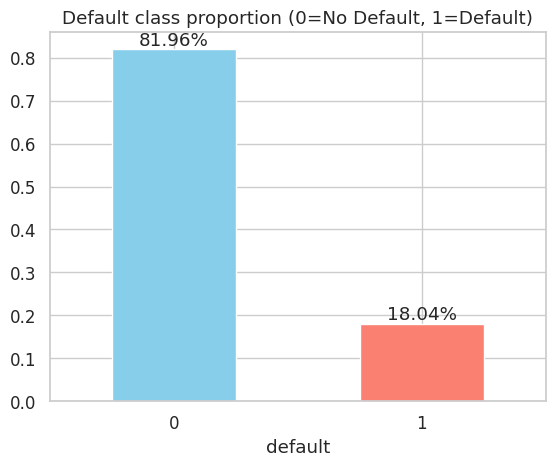

In [18]:
ax = df['default'].value_counts(normalize=True).plot(
    kind='bar',
    color=['skyblue', 'salmon'],
    rot=0,
    title='Default class proportion (0=No Default, 1=Default)'
)
for i, v in enumerate(df['default'].value_counts(normalize=True)):
    ax.text(i, v + 0.01, f"{v:.2%}", ha='center')
plt.show()

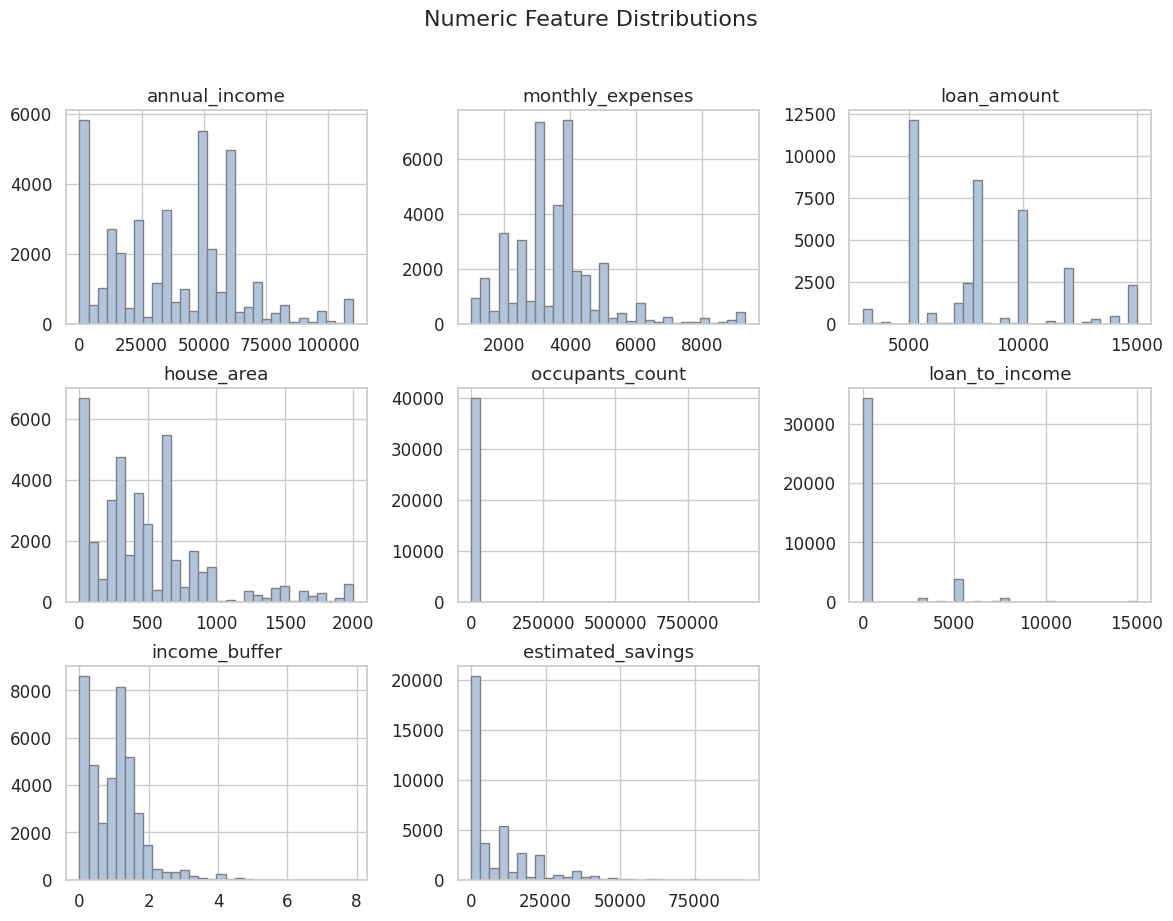

In [19]:
num_cols = ['annual_income', 'monthly_expenses', 'loan_amount',
             'house_area', 'occupants_count', 'loan_to_income',
             'income_buffer', 'estimated_savings']

df[num_cols].hist(bins=30, figsize=(14,10), color='lightsteelblue', edgecolor='gray')
plt.suptitle('Numeric Feature Distributions', fontsize=16)
plt.show()

/tmp/ipython-input-3730499915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y=col, data=df, palette=['lightblue','salmon'])


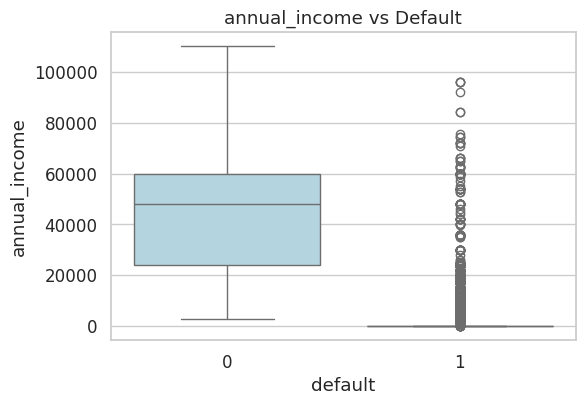

/tmp/ipython-input-3730499915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y=col, data=df, palette=['lightblue','salmon'])


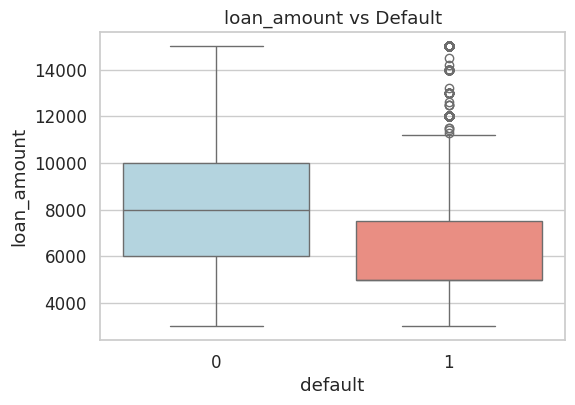

/tmp/ipython-input-3730499915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y=col, data=df, palette=['lightblue','salmon'])


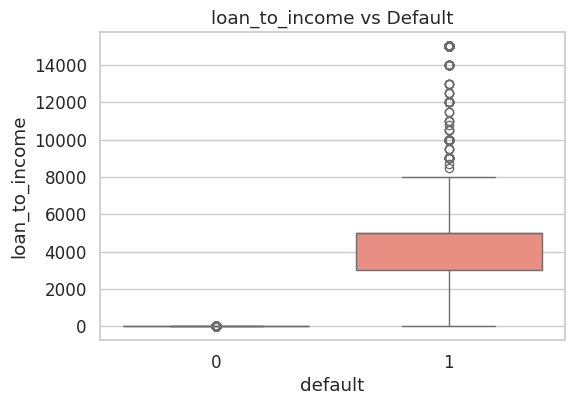

/tmp/ipython-input-3730499915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y=col, data=df, palette=['lightblue','salmon'])


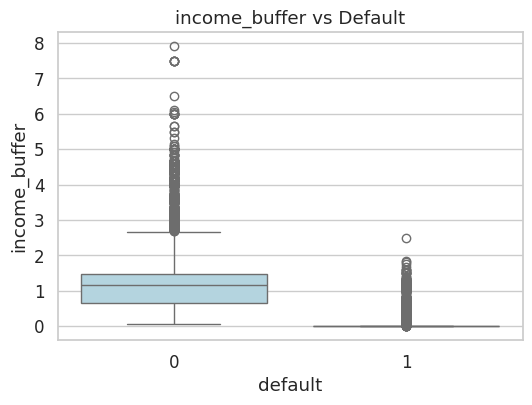

In [20]:
for col in ['annual_income', 'loan_amount', 'loan_to_income', 'income_buffer']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='default', y=col, data=df, palette=['lightblue','salmon'])
    plt.title(f'{col} vs Default')
    plt.show()

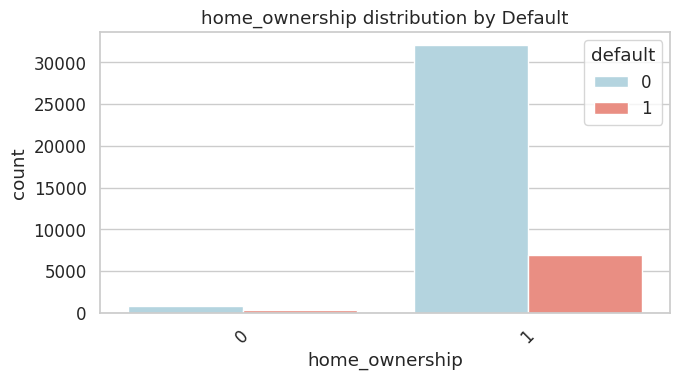

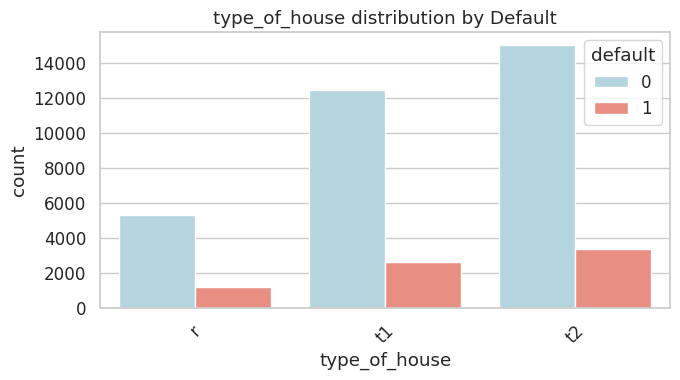

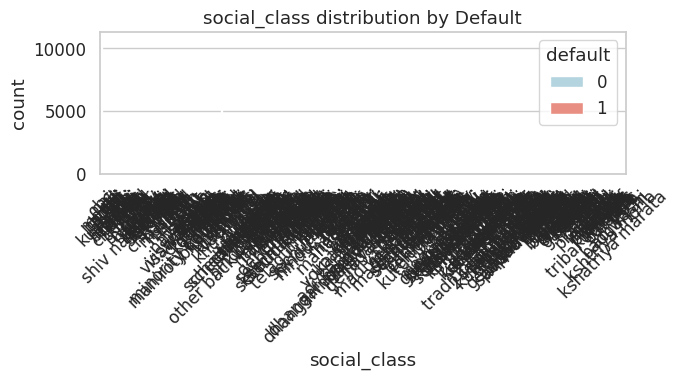

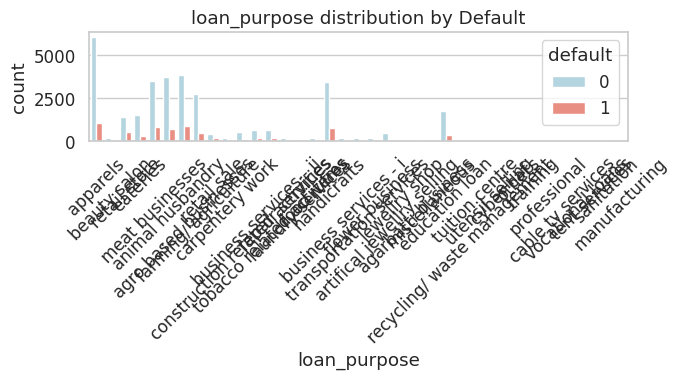

In [21]:
cat_cols = ['home_ownership','type_of_house','social_class','loan_purpose']

for c in cat_cols:
    if c in df.columns:
        plt.figure(figsize=(7,4))
        sns.countplot(x=c, hue='default', data=df,
                      palette=['lightblue','salmon'])
        plt.title(f'{c} distribution by Default')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

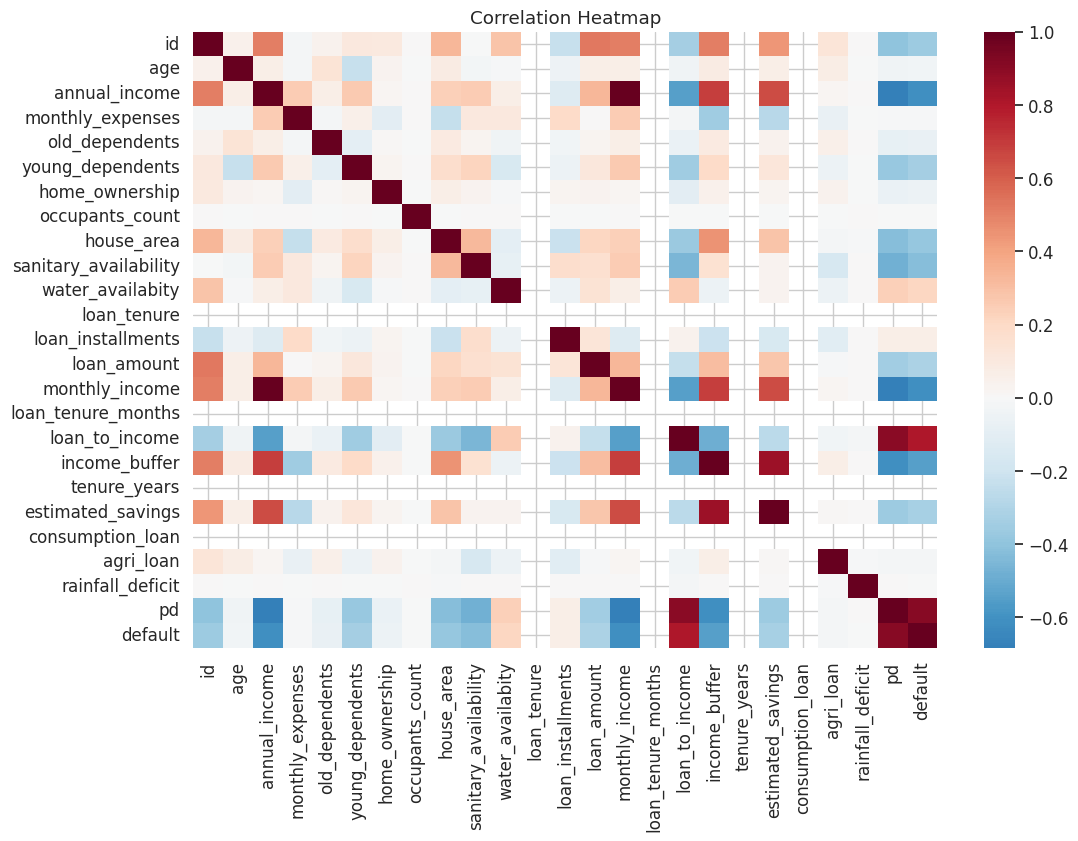

In [22]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="RdBu_r", center=0, annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [23]:
corr_target = corr['default'].sort_values(ascending=False)
print("\nTop correlations with default:\n")
print(corr_target)


Top correlations with default:

default                  1.000000
pd                       0.902400
loan_to_income           0.806711
water_availabity         0.214763
loan_installments        0.061657
rainfall_deficit        -0.000494
occupants_count         -0.002524
monthly_expenses        -0.006801
agri_loan               -0.020234
age                     -0.037617
home_ownership          -0.057250
old_dependents          -0.072923
loan_amount             -0.309301
estimated_savings       -0.329947
young_dependents        -0.337564
id                      -0.366533
house_area              -0.382339
sanitary_availability   -0.423073
income_buffer           -0.549784
monthly_income          -0.616185
annual_income           -0.616185
loan_tenure                   NaN
loan_tenure_months            NaN
tenure_years                  NaN
consumption_loan              NaN
Name: default, dtype: float64


# Preprocessing

In [25]:
df = df.drop(columns=['id','pd'], errors='ignore')

In [26]:
df[['loan_tenure','loan_tenure_months','tenure_years','consumption_loan']].describe()

,loan_tenure,loan_tenure_months,tenure_years,consumption_loan
count,40000.0,40000.0,40000.0,40000.0
mean,12.0,12.0,1.0,0.0
std,0.0,0.0,0.0,0.0
min,12.0,12.0,1.0,0.0
25%,12.0,12.0,1.0,0.0
50%,12.0,12.0,1.0,0.0
75%,12.0,12.0,1.0,0.0
max,12.0,12.0,1.0,0.0


In [27]:
#no variance shown
drop_cols = ['loan_tenure','loan_tenure_months','tenure_years','consumption_loan']
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')

In [28]:
#social class has 457 unique values so if i OHE all of them, there will be 457 cols-> not good
#so i'll take the top 20 classes and OHE them while i mark the rest as others and in UI that's what i'll show in the dropdown, i.e. 20 different options and 1 option as "others"
top_classes = df['social_class'].value_counts().nlargest(20).index
df['social_class'] = df['social_class'].apply(lambda x: x if x in top_classes else 'other')

In [29]:
#OHE
df = pd.get_dummies(df, columns=['social_class'], drop_first=True)

In [30]:
cat_cols = [ 'city', 'type_of_house', 'social_class',
             'loan_purpose', 'primary_business', 'secondary_business' ]

df = pd.get_dummies(df, columns=[c for c in cat_cols if c in df.columns], drop_first=True)

In [31]:
df.head()

,age,sex,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,...,primary_business_wood selling,primary_business_wooden apple beads making,primary_business_wooden toys business,primary_business_wool knitting,primary_business_worship material making,primary_business_xerox shop,secondary_business_daily wage labourer,secondary_business_livestock rearing,secondary_business_none,secondary_business_others
0,22,f,36000.0,5000.0,0,2,1,4,70.0,1,...,False,False,False,False,False,False,False,False,False,True
1,21,f,94000.0,3600.0,1,1,1,4,80.0,1,...,False,False,False,False,False,False,False,False,True,False
2,24,m,48000.0,4000.0,0,2,1,4,50.0,1,...,False,False,False,False,False,False,False,False,False,True
3,26,f,7000.0,5000.0,0,2,1,5,50.0,1,...,False,False,False,False,False,False,False,False,True,False
4,23,f,36000.0,3500.0,0,0,1,1,112.0,1,...,False,False,False,False,False,False,False,False,False,False


In [32]:
df.dtypes

,0
age,int64
sex,object
annual_income,float64
monthly_expenses,float64
old_dependents,int64
...,...
primary_business_xerox shop,bool
secondary_business_daily wage labourer,bool
secondary_business_livestock rearing,bool
secondary_business_none,bool


In [33]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [34]:
df.dtypes

,0
age,int64
sex,object
annual_income,float64
monthly_expenses,float64
old_dependents,int64
...,...
primary_business_xerox shop,int64
secondary_business_daily wage labourer,int64
secondary_business_livestock rearing,int64
secondary_business_none,int64


In [35]:
df.head()

,age,sex,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,...,primary_business_wood selling,primary_business_wooden apple beads making,primary_business_wooden toys business,primary_business_wool knitting,primary_business_worship material making,primary_business_xerox shop,secondary_business_daily wage labourer,secondary_business_livestock rearing,secondary_business_none,secondary_business_others
0,22,f,36000.0,5000.0,0,2,1,4,70.0,1,...,0,0,0,0,0,0,0,0,0,1
1,21,f,94000.0,3600.0,1,1,1,4,80.0,1,...,0,0,0,0,0,0,0,0,1,0
2,24,m,48000.0,4000.0,0,2,1,4,50.0,1,...,0,0,0,0,0,0,0,0,0,1
3,26,f,7000.0,5000.0,0,2,1,5,50.0,1,...,0,0,0,0,0,0,0,0,1,0
4,23,f,36000.0,3500.0,0,0,1,1,112.0,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df.dtypes.value_counts()
df.select_dtypes(exclude=['number'])

,sex
0,f
1,f
2,m
3,f
4,f
...,...
39995,f
39996,f
39997,f
39998,f


In [37]:
df['sex'] = df['sex'].astype(str).str.strip().str.lower()

In [38]:
df['sex'] = df['sex'].map({'m': 1, 'male': 1, 'f': 0, 'female': 0})

In [39]:
df['sex'].value_counts(dropna=False)

,count
sex,
0.0,37622
1.0,2371
NaN,7


In [40]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [41]:
df.dtypes.value_counts()

,count
int64,1255
float64,10


In [42]:
non_numeric = df.select_dtypes(exclude=['int64','float64'])
print(non_numeric.columns)

Index([], dtype='object')


Dimensionality using Feature Selection

In [43]:
#removing cols that are mostly constant
freq = (df.values != 0).mean(axis=0)   # fraction of non-zeros
keep_mask = (freq >= 0.01) & (freq <= 0.99)
df = df.loc[:, keep_mask]

In [44]:
df.shape

(40000, 91)

In [45]:
#to know the most informative features
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

X = df.drop(columns=['default'])
y = df['default']

mi = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print(mi_series.head(15))


annual_income                             0.362302
monthly_income                            0.361754
house_area                                0.289627
occupants_count                           0.285234
social_class_unknown                      0.282916
estimated_savings                         0.139063
sanitary_availability                     0.089524
young_dependents                          0.083857
social_class_obc                          0.037595
water_availabity                          0.028910
secondary_business_none                   0.018376
social_class_other                        0.012894
city_bahoriband                           0.011114
social_class_sc                           0.010770
secondary_business_daily wage labourer    0.010076
dtype: float64


In [46]:
df.head()

,sex,annual_income,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,monthly_income,...,primary_business_rice business,primary_business_saree business,primary_business_school,primary_business_tailoring,primary_business_vegetable cultivation,primary_business_vegetable vendor,primary_business_weaver,secondary_business_daily wage labourer,secondary_business_none,secondary_business_others
0,0.0,36000.0,0,2,1,4,70.0,1,0,3000.000000,...,0,0,0,1,0,0,0,0,0,1
1,0.0,94000.0,1,1,1,4,80.0,1,0,7833.333333,...,0,0,0,1,0,0,0,0,1,0
2,1.0,48000.0,0,2,1,4,50.0,1,0,4000.000000,...,0,0,0,0,0,0,0,0,0,1
3,0.0,7000.0,0,2,1,5,50.0,1,0,583.333333,...,0,0,0,1,0,0,0,0,1,0
4,0.0,36000.0,0,0,1,1,112.0,1,0,3000.000000,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df.to_csv("RuralCreditData_preprocessed.csv", index=False)

In [48]:
from google.colab import files
files.download("RuralCreditData_preprocessed.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd

In [4]:
df=pd.read_csv("RuralCreditData_preprocessed.csv")

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(columns=['default'])
y = df['default']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [8]:
X_train.shape

(32000, 90)

In [9]:
X_test.shape

(8000, 90)

In [10]:
y_train.mean().round(3)

np.float64(0.18)

In [13]:
y_test.mean().round(3)

np.float64(0.18)

In [14]:
#will be using pipeline for all the algos to be tested into optuna because
#algos like logistic regression and SVM need scaling whereas algis like XGBoost, DT, RF don't

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [16]:
pipelines = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42))
    ]),

    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVC(class_weight='balanced', probability=True, random_state=42))
    ]),

    "Random Forest": Pipeline([
        ("model", RandomForestClassifier(class_weight='balanced', random_state=42))
    ]),

    "Decision Tree": Pipeline([
        ("model", DecisionTreeClassifier(class_weight='balanced', random_state=42))
    ]),

    "XGBoost": Pipeline([
        ("model", XGBClassifier(scale_pos_weight=(1/y_train.mean()), eval_metric='logloss', random_state=42))
    ])
}

In [17]:
from sklearn.metrics import roc_auc_score

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_prob = pipe.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print(f"{name}: ROC-AUC = {auc:.3f}")


Logistic Regression: ROC-AUC = 0.974
SVM: ROC-AUC = 0.968
Random Forest: ROC-AUC = 0.964
Decision Tree: ROC-AUC = 0.899
XGBoost: ROC-AUC = 0.970


In [18]:
print([col for col in df.columns if 'pd' in col or 'prob' in col])

[]


In [19]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [21]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 14.5 MB/s eta 0:00:00


Now that `optuna` is installed, you can run the cell to import it.

In [22]:
import optuna

In [23]:
#handing imbalance for XGBoost
pos_rate = y_train.mean()
neg_rate = 1 - pos_rate
scale_pos_weight = float(neg_rate / pos_rate)

In [24]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [28]:
import numpy as np
def build_pipeline(model_name, trial):
    if model_name == "Logistic":
        C = trial.suggest_float("logreg_C", 1e-3, 10.0, log=True)
        return Pipeline([
            ("scaler", StandardScaler()),
            ("model", LogisticRegression(
                class_weight="balanced", max_iter=3000, random_state=42, C=C, solver="lbfgs"
            ))
        ])
    elif model_name == "SVM":
        C = trial.suggest_float("svm_C", 1e-2, 10.0, log=True)
        gamma = trial.suggest_float("svm_gamma", 1e-4, 1.0, log=True)
        return Pipeline([
            ("scaler", StandardScaler()),
            ("model", SVC(
                class_weight="balanced", probability=True, random_state=42,
                C=C, gamma=gamma, kernel="rbf"
            ))
        ])
    elif model_name == "RandomForest":
        n_estimators = trial.suggest_int("rf_n_estimators", 200, 600, step=100)
        max_depth = trial.suggest_int("rf_max_depth", 4, 24)
        max_features = trial.suggest_categorical("rf_max_features", ["sqrt", "log2", None])
        min_samples_split = trial.suggest_int("rf_min_samples_split", 2, 10)
        min_samples_leaf = trial.suggest_int("rf_min_samples_leaf", 1, 5)
        return Pipeline([
            ("model", RandomForestClassifier(
                class_weight="balanced", random_state=42, n_estimators=n_estimators,
                max_depth=max_depth, max_features=max_features,
                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                n_jobs=-1
            ))
        ])
    elif model_name == "DecisionTree":
        max_depth = trial.suggest_int("dt_max_depth", 3, 24)
        min_samples_split = trial.suggest_int("dt_min_samples_split", 2, 20)
        min_samples_leaf = trial.suggest_int("dt_min_samples_leaf", 1, 10)
        return Pipeline([
            ("model", DecisionTreeClassifier(
                class_weight="balanced", random_state=42, max_depth=max_depth,
                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf
            ))
        ])
    elif model_name == "XGBoost":
        n_estimators = trial.suggest_int("xgb_n_estimators", 200, 800, step=100)
        max_depth = trial.suggest_int("xgb_max_depth", 3, 10)
        learning_rate = trial.suggest_float("xgb_learning_rate", 0.01, 0.3, log=True)
        subsample = trial.suggest_float("xgb_subsample", 0.6, 1.0)
        colsample_bytree = trial.suggest_float("xgb_colsample_bytree", 0.6, 1.0)
        reg_lambda = trial.suggest_float("xgb_reg_lambda", 0.0, 5.0)
        return Pipeline([
            ("model", XGBClassifier(
                random_state=42, eval_metric="logloss",
                n_estimators=n_estimators, max_depth=max_depth,
                learning_rate=learning_rate, subsample=subsample,
                colsample_bytree=colsample_bytree, reg_lambda=reg_lambda,
                scale_pos_weight=scale_pos_weight, n_jobs=-1
            ))
        ])
    else:
        raise ValueError("Unknown model")

In [29]:
def objective(trial):
    model_name = trial.suggest_categorical("model", ["Logistic","SVM","RandomForest","DecisionTree","XGBoost"])
    pipe = build_pipeline(model_name, trial)
    scores = cross_val_score(pipe, X_train, y_train, scoring="roc_auc", cv=cv, n_jobs=-1) # CV ROC-AUC
    return float(np.mean(scores))

In [30]:
study = optuna.create_study(direction="maximize", study_name="credit_model_selection")
study.optimize(objective, n_trials=40, show_progress_bar=True)

[I 2025-10-19 11:26:19,557] A new study created in memory with name: credit_model_selection


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-10-19 11:26:22,447] Trial 0 finished with value: 0.9740206480546652 and parameters: {'model': 'Logistic', 'logreg_C': 7.305117741957009}. Best is trial 0 with value: 0.9740206480546652.
[I 2025-10-19 11:26:24,400] Trial 1 finished with value: 0.9740223476213131 and parameters: {'model': 'Logistic', 'logreg_C': 0.009960821971458566}. Best is trial 1 with value: 0.9740223476213131.
[I 2025-10-19 11:26:26,307] Trial 2 finished with value: 0.9740429801109165 and parameters: {'model': 'Logistic', 'logreg_C': 0.06681914006558334}. Best is trial 2 with value: 0.9740429801109165.
[I 2025-10-19 11:27:03,285] Trial 3 finished with value: 0.9660288511006423 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 600, 'xgb_max_depth': 10, 'xgb_learning_rate': 0.17203313291520256, 'xgb_subsample': 0.8191245673817371, 'xgb_colsample_bytree': 0.8727621099699274, 'xgb_reg_lambda': 4.193746713951004}. Best is trial 2 with value: 0.9740429801109165.
[I 2025-10-19 11:27:15,341] Trial 4 finished 

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[I 2025-10-19 11:40:52,229] Trial 7 finished with value: 0.9711467926546046 and parameters: {'model': 'SVM', 'svm_C': 2.1811965349982367, 'svm_gamma': 0.0018172582816375548}. Best is trial 6 with value: 0.9740558607202627.
[I 2025-10-19 11:40:53,487] Trial 8 finished with value: 0.9479897796236434 and parameters: {'model': 'DecisionTree', 'dt_max_depth': 17, 'dt_min_samples_split': 12, 'dt_min_samples_leaf': 7}. Best is trial 6 with value: 0.9740558607202627.
[I 2025-10-19 11:40:54,775] Trial 9 finished with value: 0.9740389839488681 and parameters: {'model': 'Logistic', 'logreg_C': 0.0808242005894375}. Best is trial 6 with value: 0.9740558607202627.
[I 2025-10-19 11:43:05,612] Trial 10 finished with value: 0.9734667417742336 and parameters: {'model': 'RandomForest', 'rf_n_estimators': 200, 'rf_max_depth': 14, 'rf_max_features': None, 'rf_min_samples_split': 10, 'rf_min_samples_leaf': 3}. Best is trial 6 with value: 0.9740558607202627.
[I 2025-10-19 11:43:07,207] Trial 11 finished with

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[I 2025-10-19 12:56:24,018] Trial 26 finished with value: 0.9713339734153834 and parameters: {'model': 'SVM', 'svm_C': 9.53748161758824, 'svm_gamma': 0.00010676435823810672}. Best is trial 20 with value: 0.975538249533941.
[I 2025-10-19 12:56:52,540] Trial 27 finished with value: 0.9754056520350902 and parameters: {'model': 'RandomForest', 'rf_n_estimators': 300, 'rf_max_depth': 18, 'rf_max_features': 'log2', 'rf_min_samples_split': 8, 'rf_min_samples_leaf': 2}. Best is trial 20 with value: 0.975538249533941.
[I 2025-10-19 12:57:10,653] Trial 28 finished with value: 0.9770900885946838 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 800, 'xgb_max_depth': 3, 'xgb_learning_rate': 0.010142041844596873, 'xgb_subsample': 0.9981536557121298, 'xgb_colsample_bytree': 0.6142734518739521, 'xgb_reg_lambda': 0.461125936732683}. Best is trial 28 with value: 0.9770900885946838.
[I 2025-10-19 12:57:29,587] Trial 29 finished with value: 0.9770951545433709 and parameters: {'model': 'XGBoost', '

In [31]:
print("Best AUC:", study.best_value)
print("Best params:", study.best_trial.params)
best_model_name = study.best_trial.params["model"]

Best AUC: 0.9771125786593388
Best params: {'model': 'XGBoost', 'xgb_n_estimators': 800, 'xgb_max_depth': 3, 'xgb_learning_rate': 0.010661816806010896, 'xgb_subsample': 0.9967343415318148, 'xgb_colsample_bytree': 0.6017186406357837, 'xgb_reg_lambda': 0.10089473216361669}


In [32]:
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_recall_fscore_support,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
best_pipe = build_pipeline(best_model_name, study.best_trial)
best_pipe.fit(X_train, y_train)

Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.6017186406357837, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.010661816806010896, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=3,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=800, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [34]:
p_test = best_pipe.predict_proba(X_test)[:, 1]

In [35]:
y_pred = (p_test >= 0.50).astype(int)

In [36]:
auc = roc_auc_score(y_test, p_test)
pr_auc = average_precision_score(y_test, p_test)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", zero_division=0)

In [37]:
print(f"AUC: {auc:.3f} | PR-AUC: {pr_auc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=3))

AUC: 0.975 | PR-AUC: 0.943 | Precision: 0.837 | Recall: 0.867 | F1: 0.852

Classification report:
               precision    recall  f1-score   support

           0      0.970     0.963     0.967      6557
           1      0.837     0.867     0.852      1443

    accuracy                          0.946      8000
   macro avg      0.904     0.915     0.909      8000
weighted avg      0.946     0.946     0.946      8000



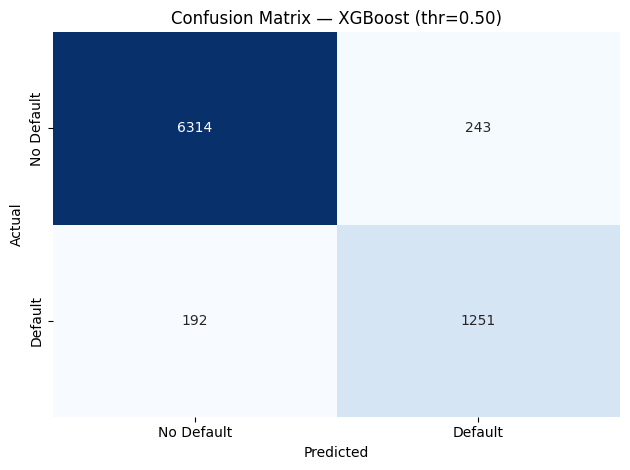

In [38]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Default","Default"], yticklabels=["No Default","Default"])
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.title("Confusion Matrix — XGBoost (thr=0.50)")
plt.tight_layout(); plt.show()

checking for a random point in the data

In [41]:
sample_row = X_test.sample(1, random_state=42)
X_test_sample = sample_row.drop(columns=["default", "pd"], errors="ignore")

In [42]:
prob_default = best_pipe.predict_proba(X_test_sample)[:, 1][0]

#to get binary prediction
pred_label = int(prob_default >= 0.5)

print(f"Predicted Probability of Default: {prob_default:.3f}")
print(f"Predicted Class (1=Default, 0=No Default): {pred_label}")


Predicted Probability of Default: 0.065
Predicted Class (1=Default, 0=No Default): 0


In [43]:
!pip install shap

In [44]:
import shap
import matplotlib.pyplot as plt

In [45]:
import shap
import matplotlib.pyplot as plt

In [47]:
explainer = shap.TreeExplainer(best_pipe.named_steps["model"])
sample_data = sample_row.copy()

In [48]:
shap_values = explainer(sample_data)

In [49]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values, sample_data)

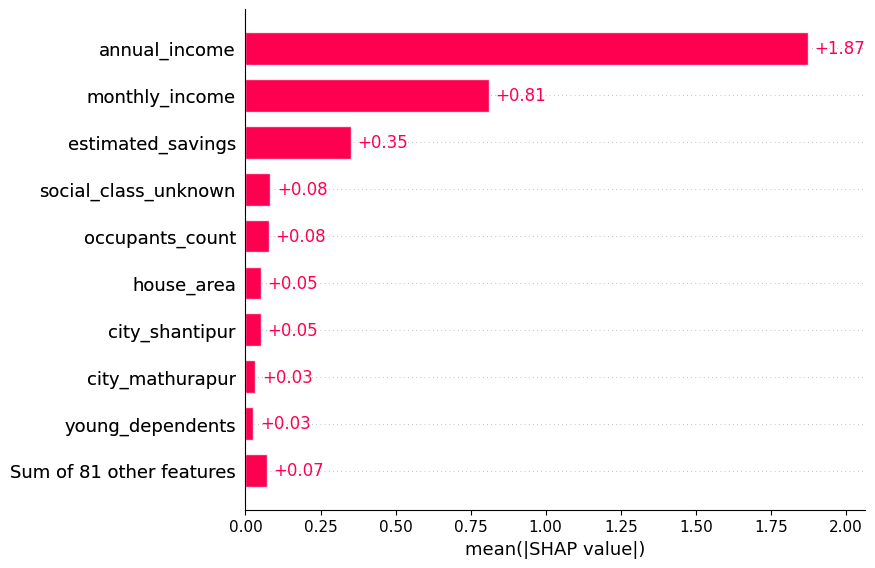

In [51]:
shap.plots.bar(shap_values, max_display=10)

In [52]:
from joblib import dump

In [53]:
dump(best_pipe, "RuralCreditModel.joblib")

['RuralCreditModel.joblib']

In [54]:
from google.colab import files
files.download("RuralCreditModel.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
import os
os.makedirs("DMDW_Rural_Credit_Project", exist_ok=True)

In [56]:
import shutil

In [66]:
shutil.copy("RuralCreditModel.joblib", "DMDW_Rural_Credit_Project/")
shutil.copy("feature_columns.json", "DMDW_Rural_Credit_Project/")
shutil.copy("RuralCreditData_preprocessed.csv", "DMDW_Rural_Credit_Project/")
shutil.copy("DMDW_project.ipynb", "DMDW_Rural_Credit_Project/")

'DMDW_Rural_Credit_Project/RuralCreditData_preprocessed.csv'